In [1]:
!pwd

/home/zhimin90/DePaul/CSC468/Project/Model


In [2]:
CSV_PATH = "/home/zhimin90/DePaul/DSC468/Project/Asset/CSV/"

In [3]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2",order="date DESC", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.iloc[0:99,-20:-1]

date                    block  iucr       primary_type  \
0   2020-05-11T23:59:00.000        018XX N MOZART ST  1477  WEAPONS VIOLATION   
1   2020-05-11T23:53:00.000   053XX S KILPATRICK AVE  2825      OTHER OFFENSE   
2   2020-05-11T23:40:00.000       008XX S WABASH AVE  1330  CRIMINAL TRESPASS   
3   2020-05-11T23:39:00.000       063XX S JUSTINE ST  2825      OTHER OFFENSE   
4   2020-05-11T23:30:00.000      029XX W DIVISION ST  0460            BATTERY   
..                      ...                      ...   ...                ...   
94  2020-05-11T18:46:00.000      001XX S OAKLEY BLVD  5131      OTHER OFFENSE   
95  2020-05-11T18:45:00.000  031XX W WASHINGTON BLVD  0820              THEFT   
96  2020-05-11T18:40:00.000          012XX S TROY ST  1310    CRIMINAL DAMAGE   
97  2020-05-11T18:39:00.000       006XX S WABASH AVE  143A  WEAPONS VIOLATION   
98  2020-05-11T18:30:00.000      069XX S CORNELL AVE  031A            ROBBERY   

                               description  \
0               RECKLESS FIREARM DISCHARGE   
1                  HARASSMENT BY TELEPHONE   
2                                  TO LAND   
3                  HARASSMENT BY TELEPHONE   
4                                   SIMPLE   
..                                     ...   
94  VIOLENT OFFENDER - ANNUAL REGISTRATION   
95                          $500 AND UNDER   
96                             TO PROPERTY   
97           UNLAWFUL POSSESSION - HANDGUN   
98                         ARMED - HANDGUN   

                      location_description  arrest  domestic  beat district  \
0                                   STREET   False     False  1421      014   
1                                RESIDENCE   False     False  0815      008   
2   PARKING LOT / GARAGE (NON RESIDENTIAL)    True     False  0123      001   
3                                RESIDENCE   False     False  0725      007   
4                                 SIDEWALK   False     False  1423      014   
..                                     ...     ...       ...   ...      ...   
94                                  STREET    True     False  1223      012   
95                               APARTMENT   False     False  1222      012   
96                               RESIDENCE   False     False  1022      010   
97                                  STREET    True     False  0123      001   
98                                SIDEWALK   False     False  0332      003   

   ward community_area fbi_code x_coordinate y_coordinate  year  \
0     1             22       15      1157130      1912219  2020   
1    23             56       26      1145930      1868857  2020   
2     4             32       26      1176918      1896566  2020   
3    16             67       26      1167096      1862622  2020   
4    26             24      08B      1156754      1907844  2020   
..  ...            ...      ...          ...          ...   ...   
94   27             28       26      1161105      1899226  2020   
95   27             27       06      1155358      1900511  2020   
96   24             29       14      1155557      1894190  2020   
97   42             32       15      1176895      1897468  2020   
98    5             43       03      1188551      1859257  2020   

                 updated_on      latitude      longitude  
0   2020-05-18T15:46:50.000  41.914898336  -87.698154278  
1   2020-05-18T15:46:50.000  41.796127611  -87.740402123  
2   2020-05-18T15:46:50.000  41.871520566  -87.625930316  
3   2020-05-18T15:46:50.000   41.77859117  -87.662962869  
4   2020-05-18T15:46:50.000  41.902900602  -87.699654403  
..                      ...           ...            ...  
94  2020-05-18T15:46:50.000   41.87916278  -87.683911937  
95  2020-05-18T15:46:50.000  41.882806341   -87.70497945  
96  2020-05-18T15:46:50.000  41.865456866  -87.704418782  
97  2020-05-18T15:46:50.000  41.873996228  -87.625987467  
98  2020-05-18T15:46:50.000  41.768871442  -87.584415712  

[99 rows x 19 columns]

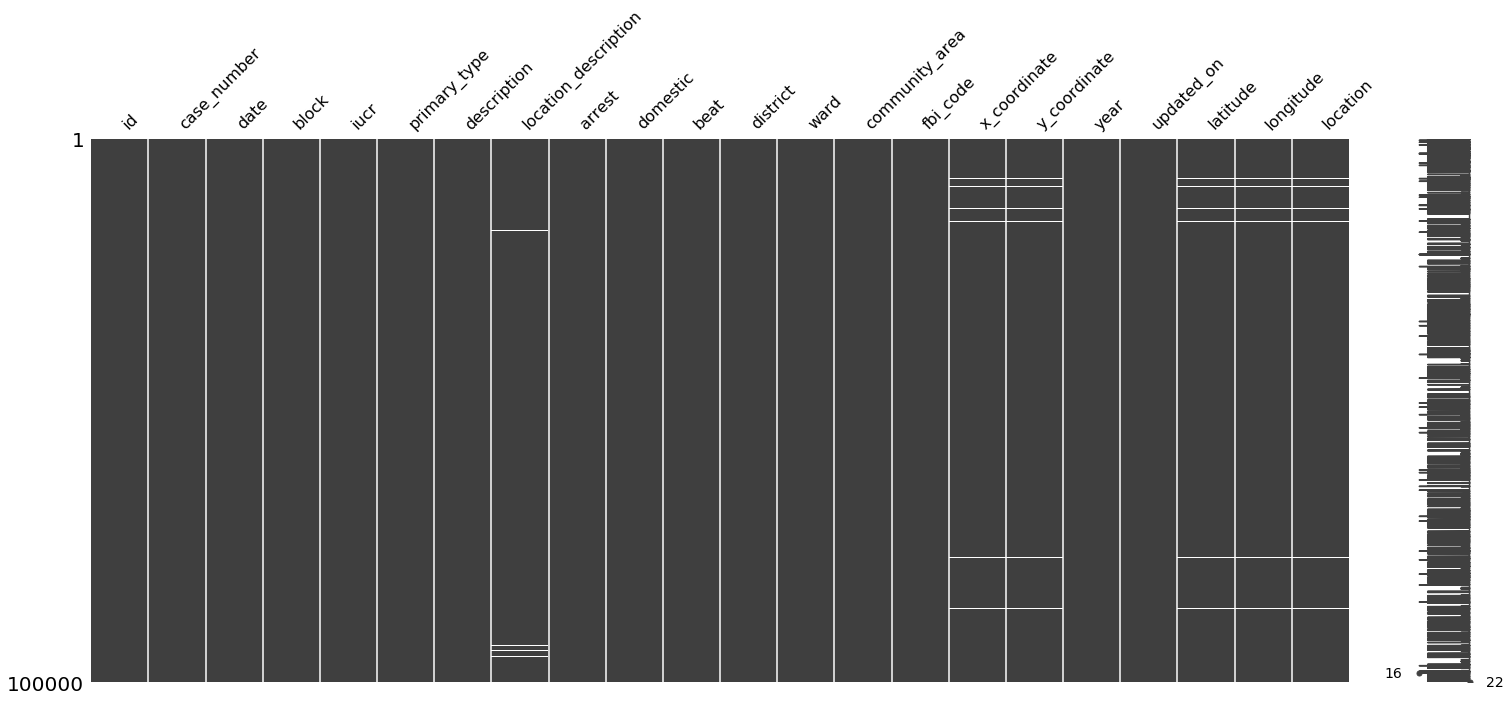

In [5]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

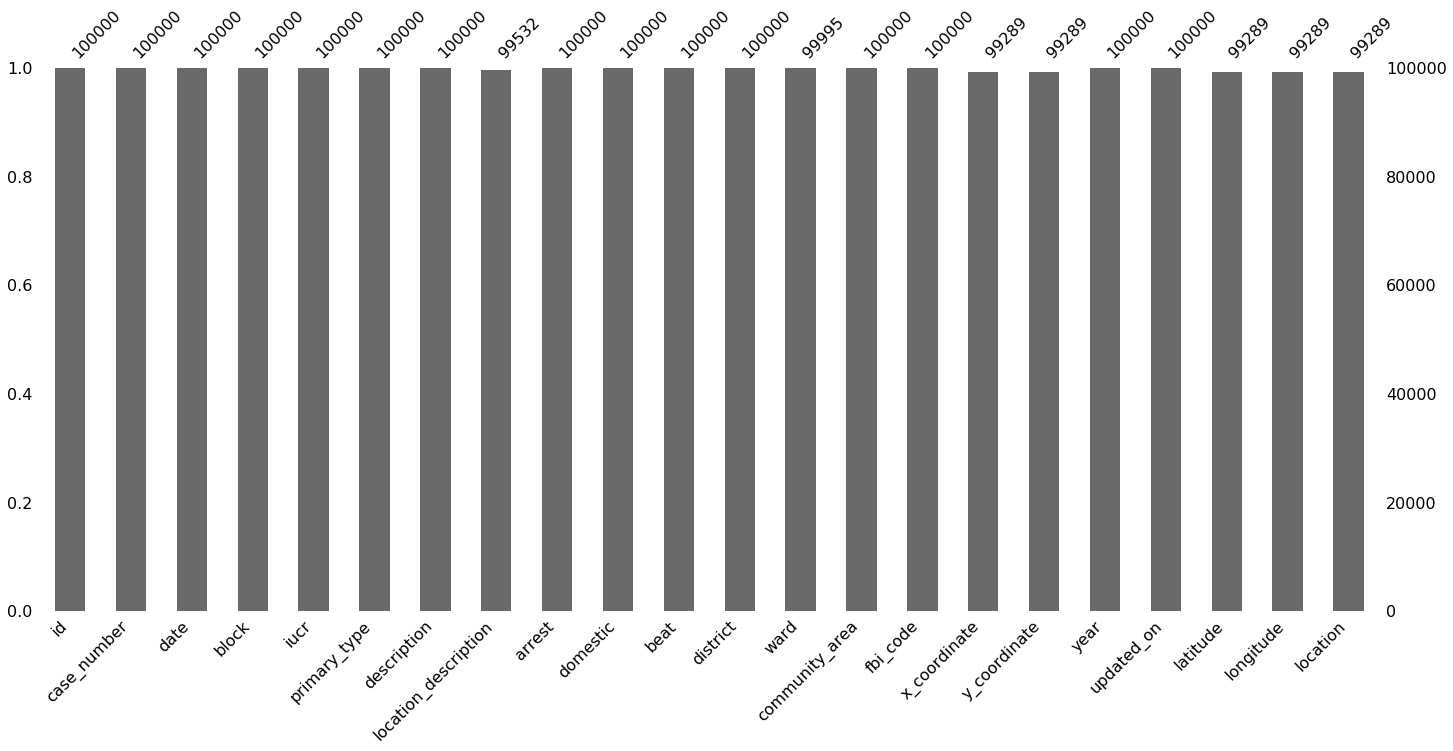

In [6]:
msno.bar(results_df) 

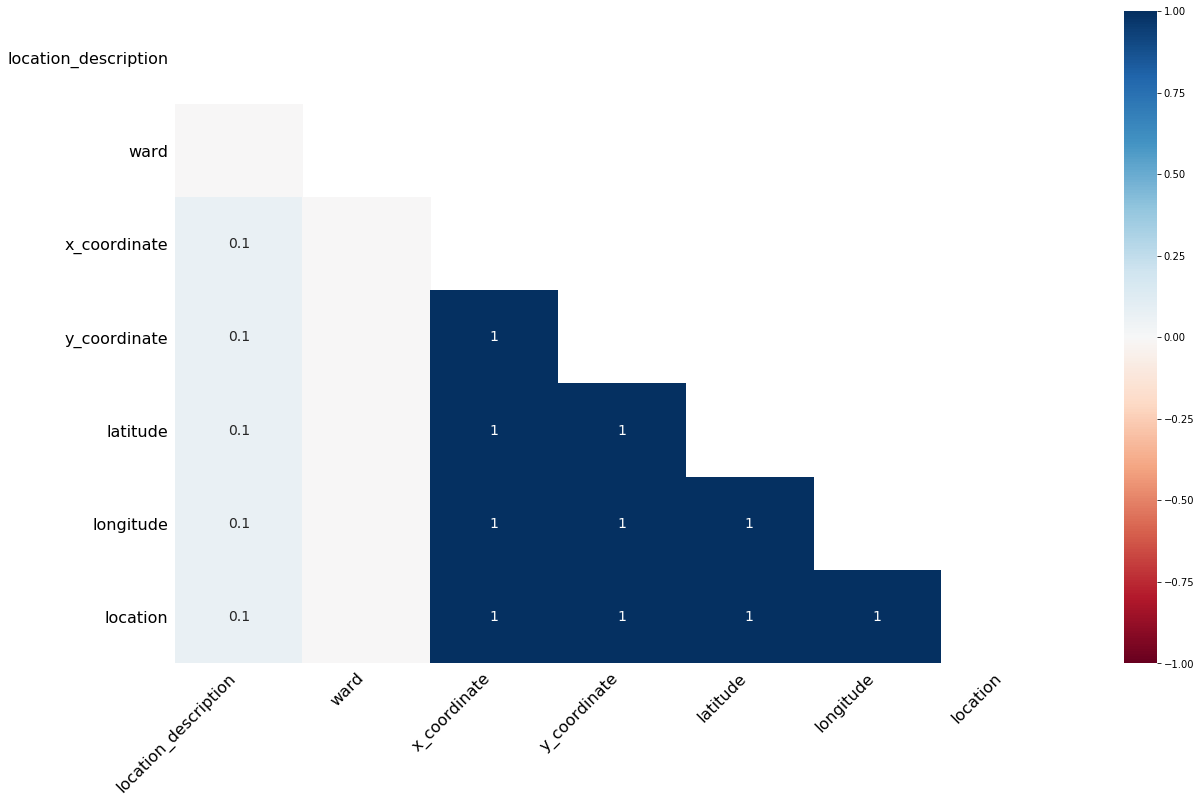

In [7]:
msno.heatmap(results_df) 

In [8]:
results_df.primary_type.value_counts()

THEFT                                23156
BATTERY                              19707
CRIMINAL DAMAGE                      10708
ASSAULT                               8129
DECEPTIVE PRACTICE                    6814
OTHER OFFENSE                         6367
NARCOTICS                             4627
MOTOR VEHICLE THEFT                   3900
BURGLARY                              3776
ROBBERY                               3524
WEAPONS VIOLATION                     2828
CRIMINAL TRESPASS                     2542
OFFENSE INVOLVING CHILDREN             968
INTERFERENCE WITH PUBLIC OFFICER       493
SEX OFFENSE                            481
PUBLIC PEACE VIOLATION                 443
CRIMINAL SEXUAL ASSAULT                336
CRIM SEXUAL ASSAULT                    269
HOMICIDE                               228
ARSON                                  172
PROSTITUTION                           169
STALKING                                74
CONCEALED CARRY LICENSE VIOLATION       68
KIDNAPPING 

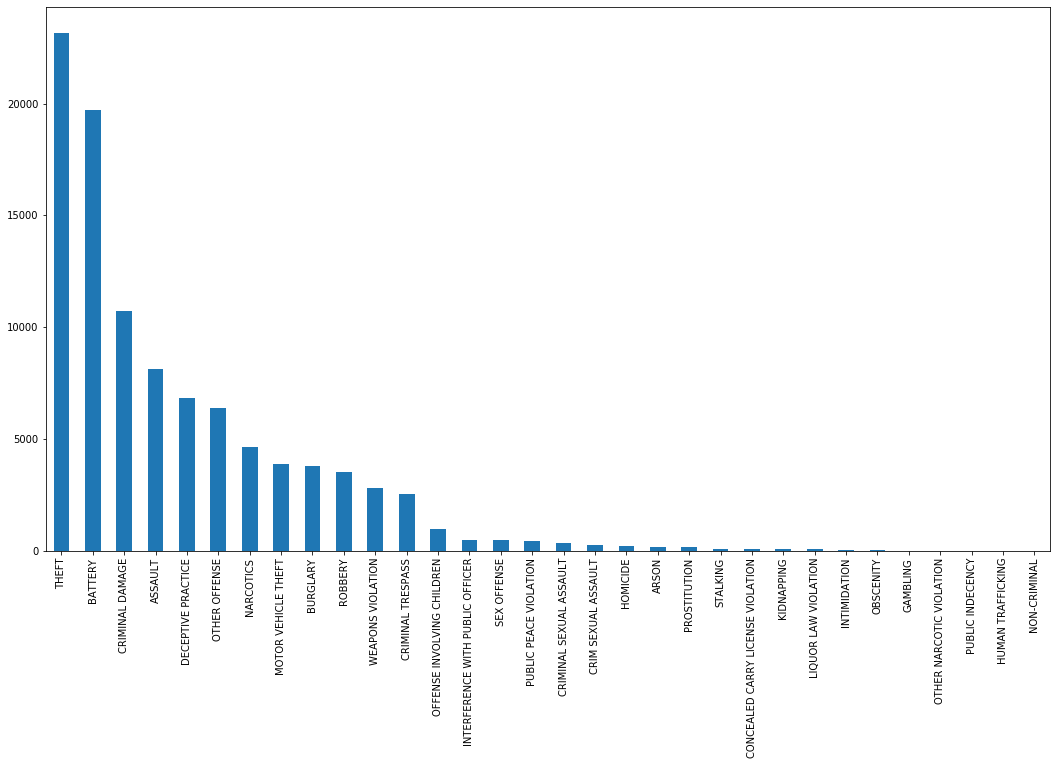

In [9]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [10]:
print(max(results_df.date))
print(min(results_df.date))

2020-05-11T23:59:00.000
2019-11-17T19:22:00.000


In [11]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [12]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [13]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022547568
41.64460494
-87.524618154
-87.934567226


In [14]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-05-11 23:59:00
2019-11-17 19:22:00


In [15]:
 df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [17]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

#geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]
geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location']]

In [18]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 99286


In [19]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022547568
41.645050759
-87.524618154
-87.934567226


#### For outputing all data in 2020 as points

In [20]:
crime_2020_gdf = geo_price_map[geo_price_map.date > pd.to_datetime("2020-01-01")]

In [21]:
crime_2020_gdf.iloc[0,:]

id                                                               12048692
case_number                                                      JD230083
date                                                  2020-05-11 23:59:00
block                                                   018XX N MOZART ST
iucr                                                                 1477
primary_type                                            WEAPONS VIOLATION
description                                    RECKLESS FIREARM DISCHARGE
location_description                                               STREET
arrest                                                              False
domestic                                                            False
beat                                                                 1421
district                                                              014
ward                                                                    1
community_area                        

In [31]:
import geopandas
import matplotlib.pyplot as plt

crime_2020_gdf = geopandas.GeoDataFrame(
    crime_2020_gdf, geometry=geopandas.points_from_xy(crime_2020_gdf.longitude, crime_2020_gdf.latitude))
crime_2020_gdf.to_file("/home/zhimin90/DePaul/CSC468/Project/Crime_2020_points.geojson", driver='GeoJSON')

In [18]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-04-09 23:59:00
2020-05-09 23:59:00
crime count: date            12159
primary_type    12159
latitude        12159
longitude       12159
dtype: int64
____________________
2020-04-02 23:59:00
2020-05-02 23:59:00
crime count: date            12311
primary_type    12311
latitude        12311
longitude       12311
dtype: int64
____________________
2020-03-26 23:59:00
2020-04-25 23:59:00
crime count: date            12369
primary_type    12369
latitude        12369
longitude       12369
dtype: int64
____________________
2020-03-19 23:59:00
2020-04-18 23:59:00
crime count: date            12462
primary_type    12462
latitude        12462
longitude       12462
dtype: int64
____________________
2020-03-12 23:59:00
2020-04-11 23:59:00
crime count: date            13621
primary_type    13621
latitude        13621
longitude       13621
dtype: int64
____________________
2020-03-05 23:59:00
2020-04-04 23:59:00
crime count: date            14858
primary_type    14858
latitude        14858
longit

In [19]:
map_arr.reverse()

In [20]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [21]:
for geo_price_map in map_arr:
    geo_price_map = geo_price_map[geo_price_map['date'].notnull()]
    print(max(geo_price_map['latitude']))
    print(min(geo_price_map['latitude']))
    print(max(geo_price_map['longitude']))
    print(min(geo_price_map['longitude']))
    print(max(geo_price_map['latitude']) < ybound[1])
    print(min(geo_price_map['latitude']) > ybound[0])
    print(max(geo_price_map['longitude']) < xbound[1])
    print(min(geo_price_map['longitude']) > xbound[0])
    print("-"*20)
    

42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022536591
41.645795846999995
-87.525427902
-87.934567226
True
True
True
True
--------------------
42.022547189
41.645050759
-87.525427902
-87.934567226
True
True
True
True
--------------------
42.022547189
41.645050759
-87.525427902
-87.92226601
True
True
True
True
--------------------
42.022547189
41.645050759
-87.524618154
-87.92226601
True
True
True
True
--------------------
42.022547189


In [22]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

date        primary_type   latitude  longitude
0     2020-05-09 23:59:00   WEAPONS VIOLATION  41.731145 -87.662929
1     2020-05-09 23:57:00     CRIMINAL DAMAGE  41.833776 -87.652252
2     2020-05-09 23:56:00       OTHER OFFENSE  41.731767 -87.641065
3     2020-05-09 23:55:00             BATTERY  41.843857 -87.719659
4     2020-05-09 23:54:00           NARCOTICS  41.888657 -87.749140
...                   ...                 ...        ...        ...
12340 2020-04-10 00:01:00             BATTERY  41.955742 -87.707363
12341 2020-04-10 00:01:00         SEX OFFENSE  41.881863 -87.707119
12342 2020-04-10 00:00:00  DECEPTIVE PRACTICE  41.989968 -87.666021
12343 2020-04-10 00:00:00               THEFT  41.889024 -87.649088
12344 2020-04-10 00:00:00            BURGLARY  41.765282 -87.578123

[12159 rows x 4 columns]

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


(-87.85041986215067, -87.52523350043245, 41.65924455069546, 42.019245840973895)

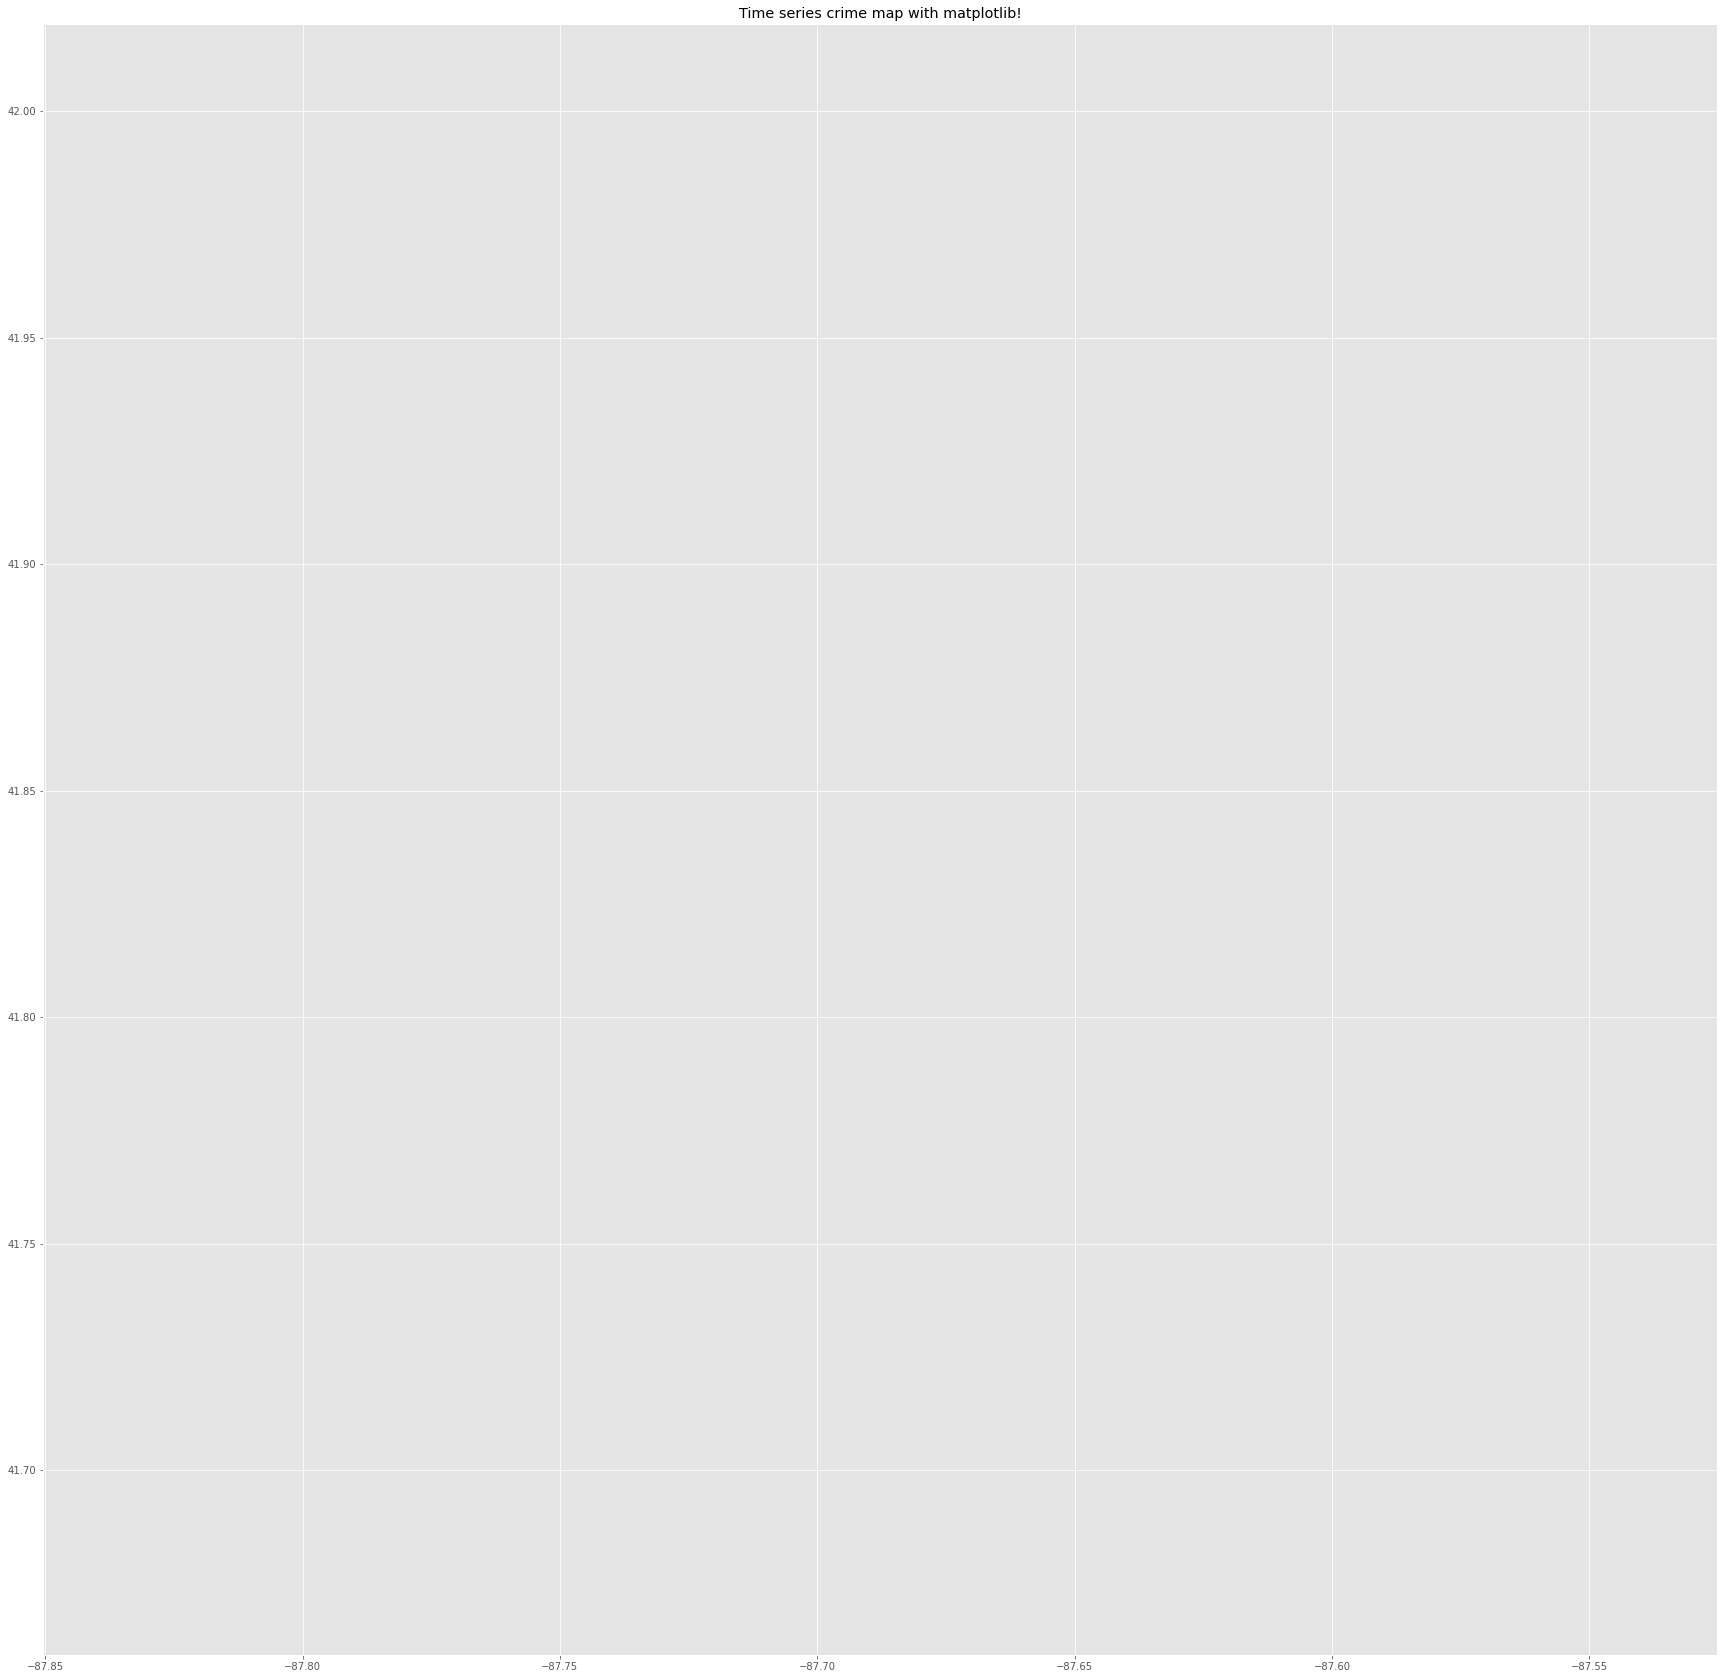

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
#anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
#anim.save(CSV_PATH + 'crime_locations_2020.gif', writer='imagemagick') 

#### Covert points into geojson and geopandas compatible geometery

In [24]:
latest_30_df = map_arr[-1][map_arr[-1]['date'].notnull()]
latest_30_df.head()

date       primary_type   latitude  longitude
0 2020-05-09 23:59:00  WEAPONS VIOLATION  41.731145 -87.662929
1 2020-05-09 23:57:00    CRIMINAL DAMAGE  41.833776 -87.652252
2 2020-05-09 23:56:00      OTHER OFFENSE  41.731767 -87.641065
3 2020-05-09 23:55:00            BATTERY  41.843857 -87.719659
4 2020-05-09 23:54:00          NARCOTICS  41.888657 -87.749140

In [77]:
import geopandas
import matplotlib.pyplot as plt

latest_30_gdf = geopandas.GeoDataFrame(
    latest_30_df, geometry=geopandas.points_from_xy(latest_30_df.longitude, latest_30_df.latitude))
latest_30_gdf[['date','primary_type','geometry']].to_file("/home/zhimin90/DePaul/DSC468/Experiment/Crime_2020_points.geojson", driver='GeoJSON')

In [24]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [25]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [26]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [27]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

@0
@1
@2
@3
@4
@5
@6
@7
@8
@9
@10
@11
@12
@13
@14
@15
@16
@17
@18
@19
@20


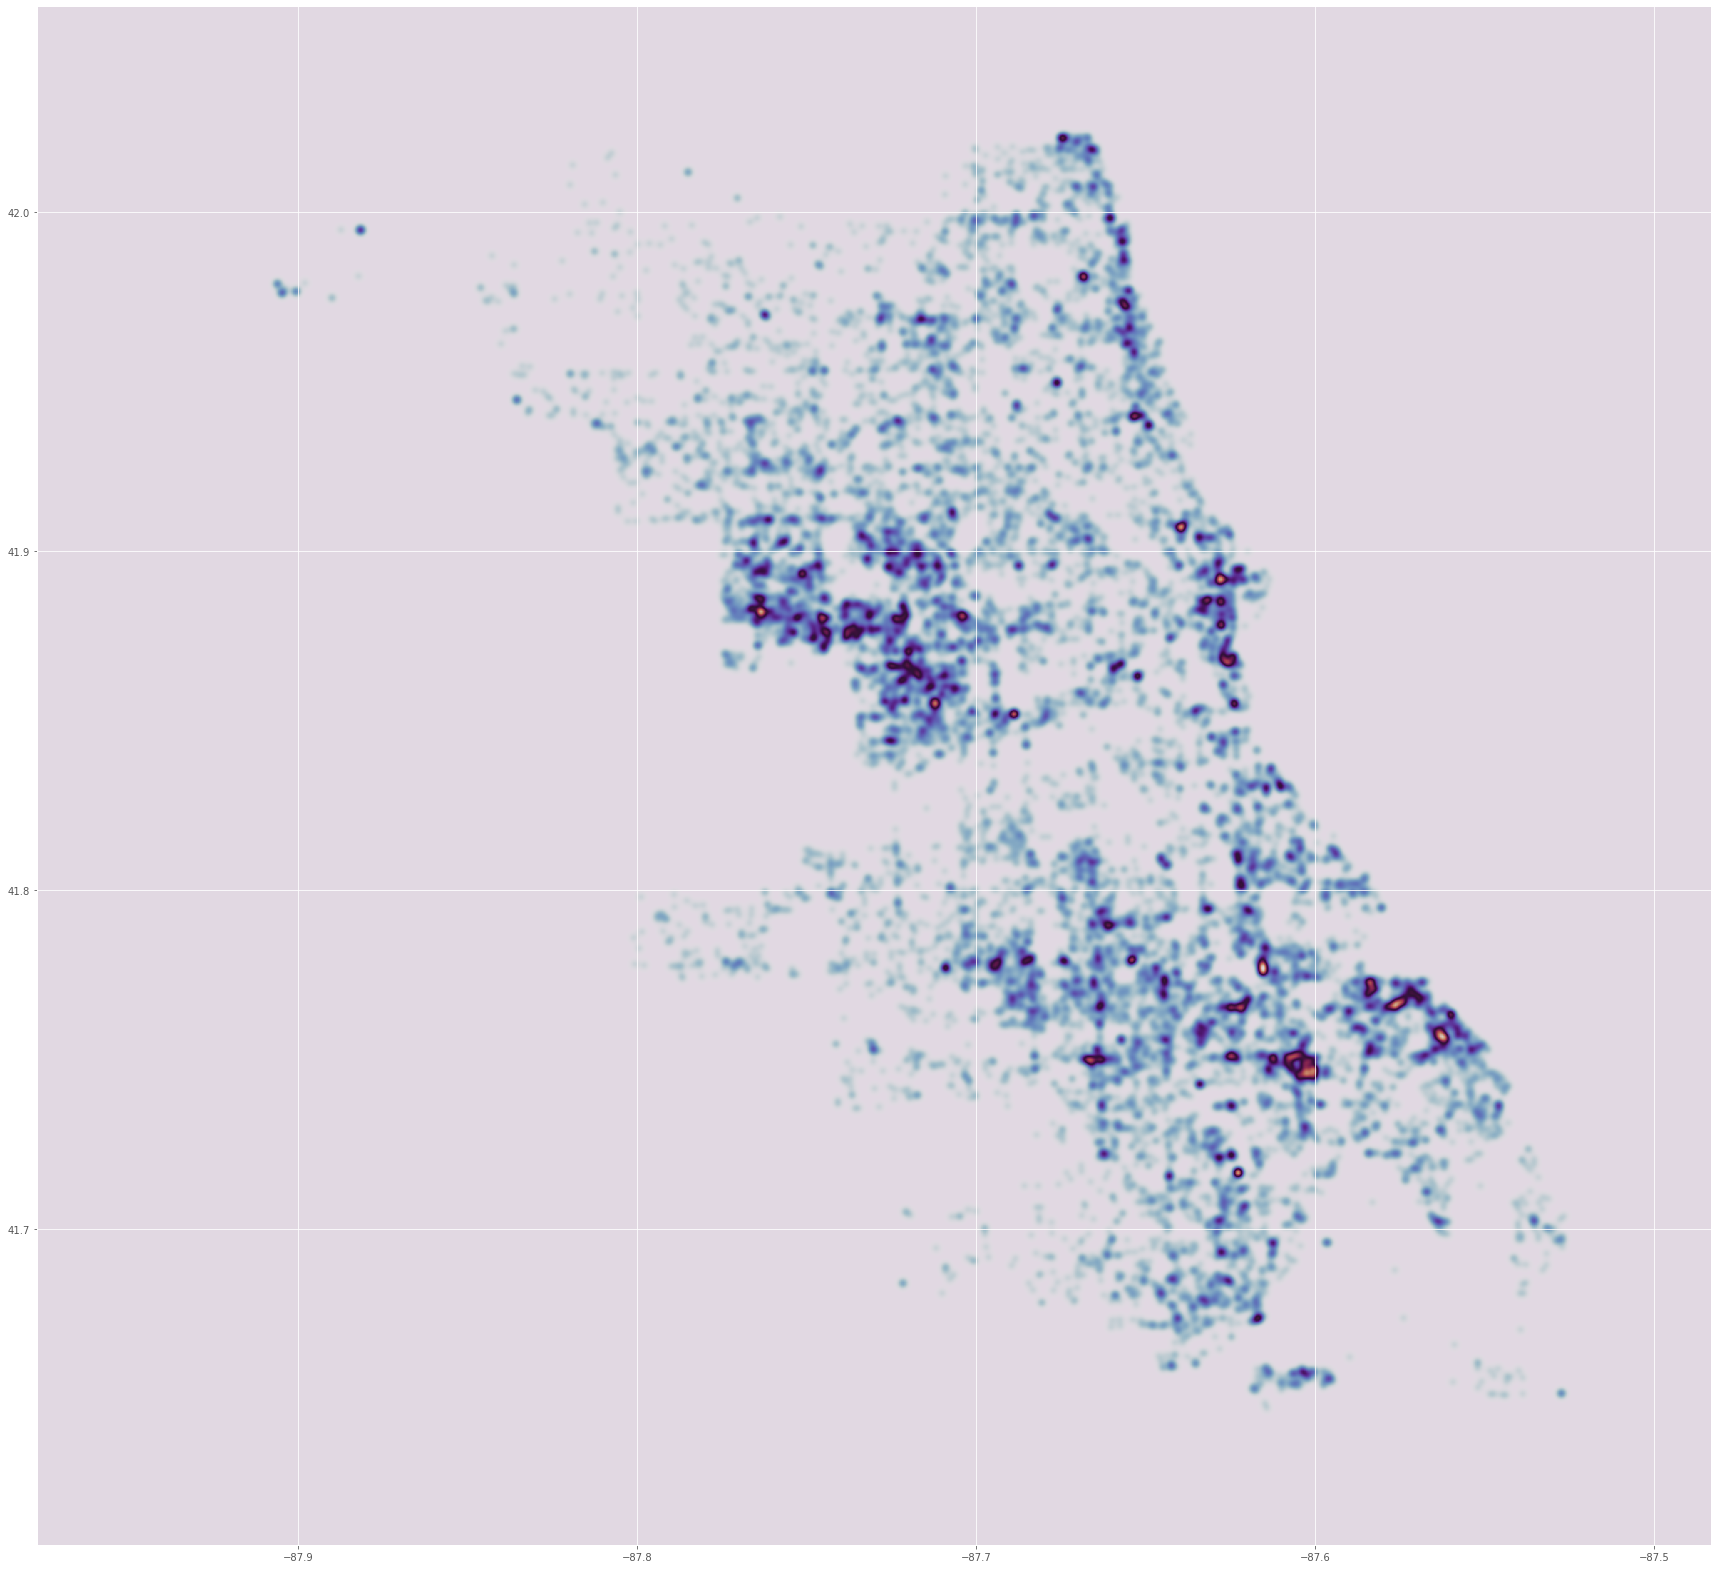

In [28]:
plt.imshow( X=np.rot90(density_matrix_t_series[-1]), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [29]:
density_matrix_t_series[0].shape

(1000, 1000)

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
dm_series_np = np.array(density_matrix_t_series)
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[1]))

normalized_matrices = scaler.fit_transform(flattened_matrix_np)
normalized_matrices = scaler2.fit_transform(normalized_matrices)

inverseTcheck = scaler2.inverse_transform(normalized_matrices)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [31]:
#This shape is for LSTM model input
normalized_matrices.shape

(21000, 1000)

In [32]:
data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
data2.shape

(21, 1000, 1000)

In [33]:
iterable = [np.rot90(matrix) for matrix in data2]

(-87.906463155, -87.526516836)
(41.647038308, 42.022536591)


(-87.97726, -87.48334, 41.60687, 42.06083)

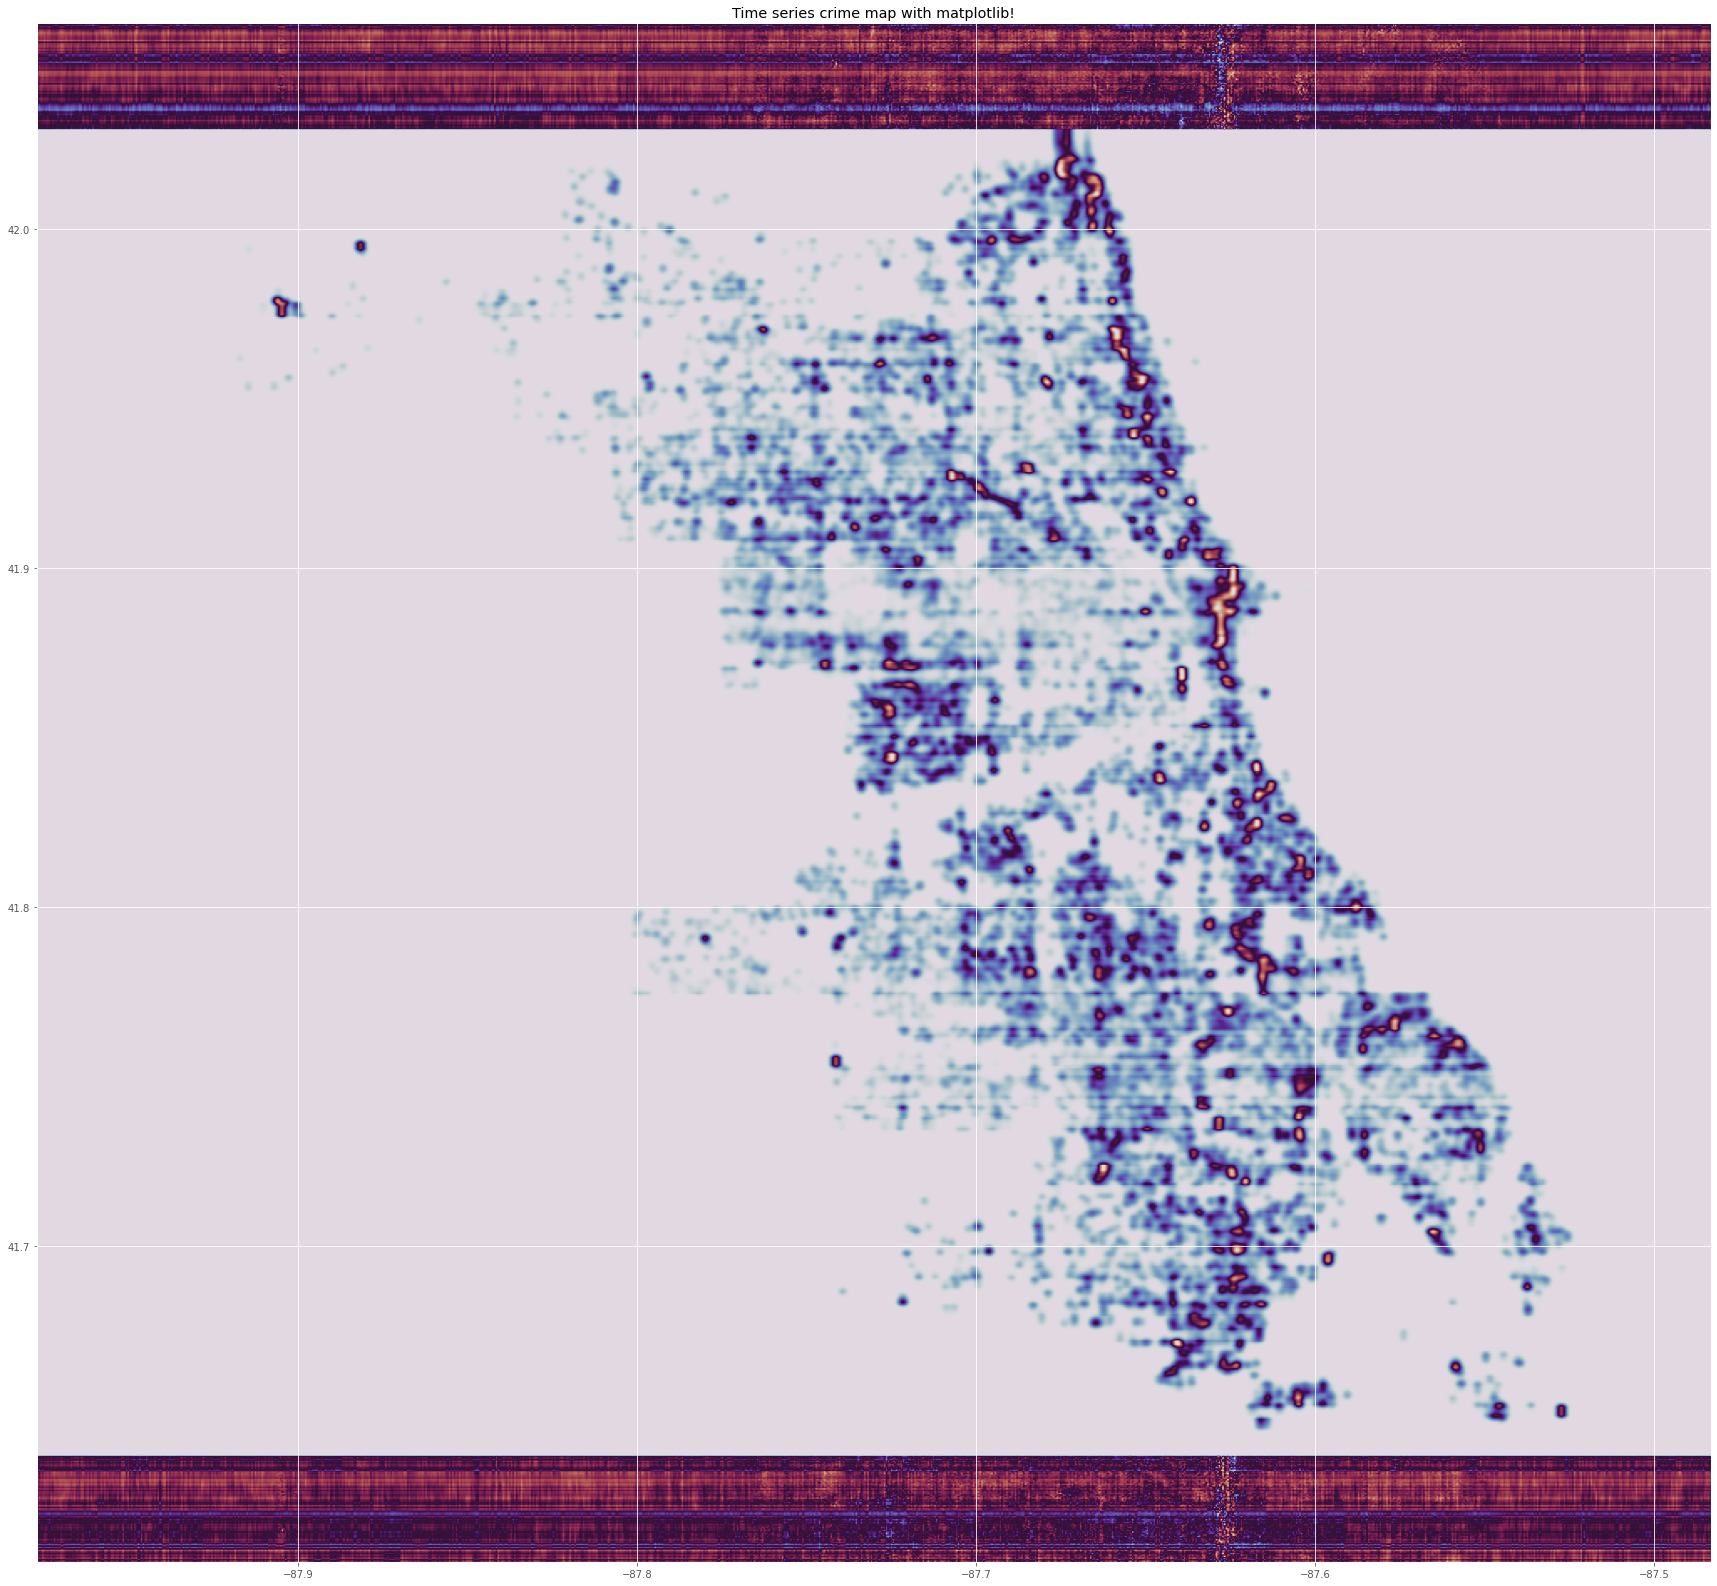

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
#anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
#anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
#plt.show()

In [35]:
start_frame_date = min(map_arr[-1]['date'][map_arr[-1]['date'].notna()])
end_frame_date = max(map_arr[-1]['date'][map_arr[-1]['date'].notna()])
time_shift = 7 #days

In [36]:
offset = yy.shape[0]
print("offset = yy.shape[0]" + str(offset))
xx = xx.ravel()
yy = yy.ravel()
xdelta = abs(xx[1] - xx[1+offset])
ydelta = abs(yy[0] - yy[1+offset])
print("xdelta"+str(xdelta))
print("ydelta"+str(ydelta))
columns = [ 'start_date', 'end_date', 'poly_coordinate', 'density']

offset = yy.shape[0]1000
xdelta0.0004944144144189977
ydelta0.0004544144144134066


In [37]:
import rasterio
from rasterio.transform import Affine
from shapely.geometry import shape
from shapely.geometry import Polygon

In [38]:
min(xx), min(yy), max(xx), max(yy)

(-87.97726, 41.60687, -87.48334, 42.06083)

In [39]:
res = (xx[-1] - xx[0]) / 1000.0

In [40]:
Z = np.rot90(density_matrix_t_series[-2],1)

In [41]:
quantile_cutoff = .1
Z[Z < np.quantile(Z.flatten(), quantile_cutoff)] = np.quantile(Z.flatten(), quantile_cutoff)

#### Bin color in to discrete integers

In [42]:
numOfColor = 10
max_density = np.max(Z)
min_density = np.min(Z)
Z_int = (((Z-min_density)*numOfColor/(max_density - min_density))*255/numOfColor).astype('int32')

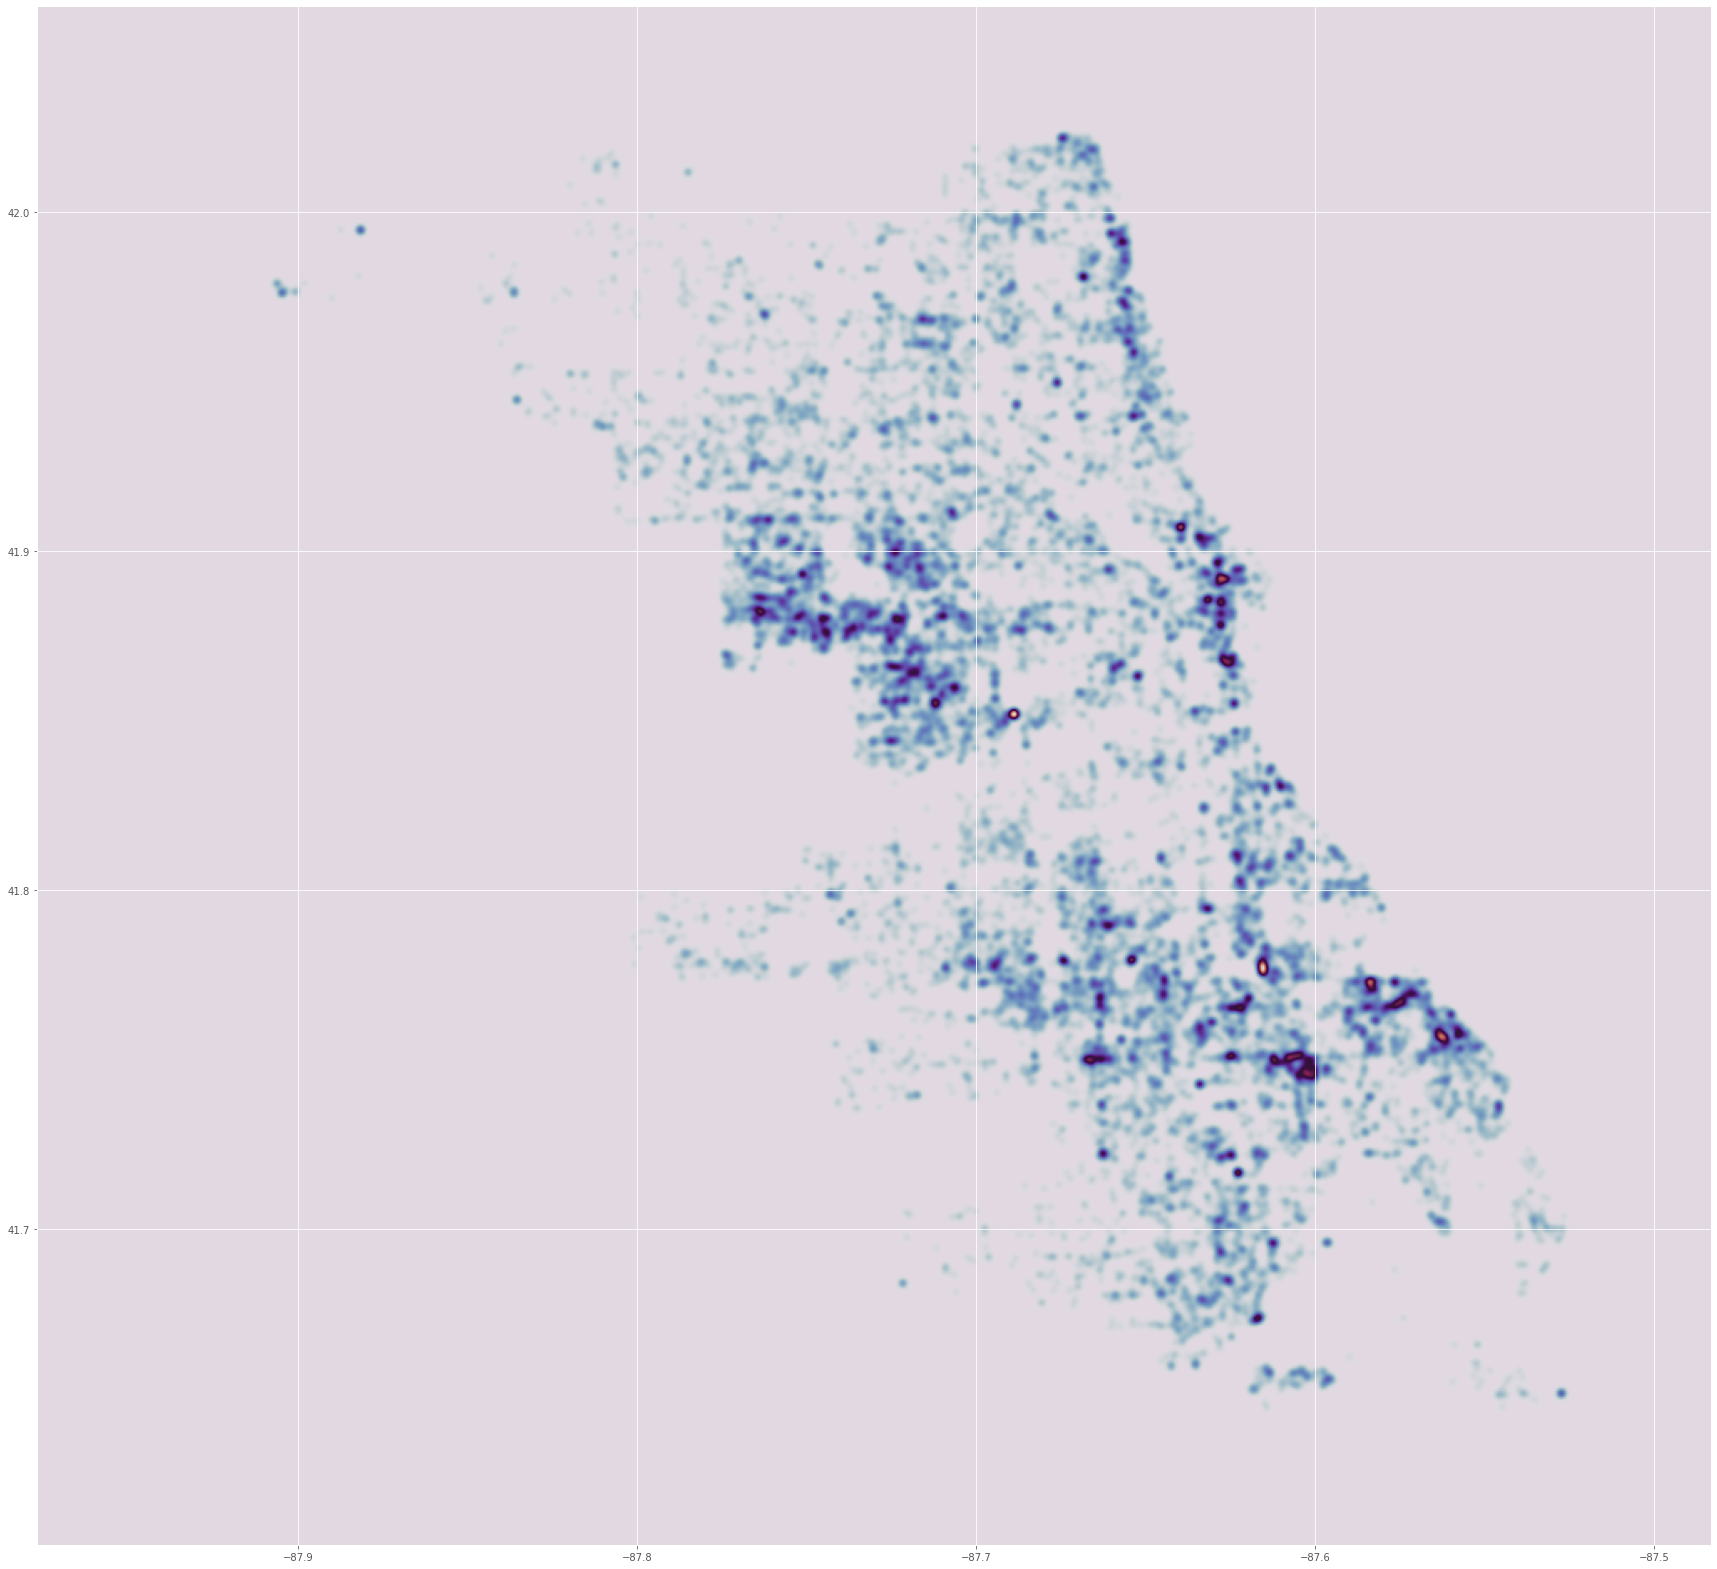

In [43]:
plt.imshow( X=Z_int, cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [44]:
Z = Z_int

In [45]:
set(Z.flatten())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 186,
 187,
 188,


In [46]:
transform = rasterio.transform.from_bounds(min(xx), min(yy), max(xx), max(yy), Z.shape[1], Z.shape[0])
transform

Affine(0.0004939200000000028, 0.0, -87.97726,
       0.0, -0.00045396000000000217, 42.06083)

In [47]:
from rasterio import features

results = ({'properties': {'raster_val': v}, 'geometry': s,'start_date':pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1))),'end_date':pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))}
        for i, (s, v)
        in enumerate(rasterio.features.shapes(Z,transform=transform)))

In [48]:
geoms = list(results)

In [49]:
geoms[0]

{'properties': {'raster_val': 1.0},
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-87.67596879999999, 42.02496716),
    (-87.67596879999999, 42.0245132),
    (-87.67498096, 42.0245132),
    (-87.67498096, 42.02496716),
    (-87.67596879999999, 42.02496716)]]},
 'start_date': Timestamp('2020-04-10 00:00:00'),
 'end_date': Timestamp('2020-05-09 23:59:00')}

In [25]:
import geopandas as gp
gpd_polygonized_raster = gp.GeoDataFrame.from_features(geoms)

NameError: name 'geoms' is not defined

In [48]:
file_dir = "Boundaries - Wards (2015-).geojson"
wards_df = gp.read_file(file_dir)

In [49]:
wards_df

shape_area     shape_leng ward  \
0   116096507.849  93073.3408379   12   
1   103143638.546  97901.3238332   16   
2    65588297.917  82183.6948197   15   
3    137290356.97  90105.1956185   20   
4   49733459.1385  38122.6928259   49   
5   142982293.923  125226.472414   23   
6   128819108.627  107529.243573   29   
7   143011018.899  90165.7974072   14   
8   123341548.953  81530.2751668    3   
9   126006901.096  119468.403755    4   
10  53934808.8716  110739.852187    2   
11   57297718.519  67016.6379392   35   
12  142463997.962  53846.7782943   21   
13  104690374.815  75191.5803706   24   
14  117333021.721  91758.1670663   13   
15   44838916.158  34831.9936751   48   
16  69739758.4303  50635.7831536   31   
17  87363636.3844  53371.3055095   47   
18  174307429.474  89794.4594966   38   
19  70214893.3538  47062.4200753   33   
20  73730115.3644  81026.9888174   30   
21  175928766.112  78608.6539809   34   
22  142879662.243  119977.208819   28   
23  95929056.6812  48374.9136177   40   
24  49422863.0048  46466.2721725   44   
25  124734729.578  105358.092147   25   
26  80692979.8113  46116.3788804   50   
27  106633676.288   63985.118325   22   
28   484238238.97  252516.011482   41   
29  183256966.765   65699.143324   18   
30  113383616.514  100910.871779   17   
31  120539114.428  69925.2023858    6   
32  115196005.523  102271.665896    5   
33  65206365.4153  48544.5349075   43   
34  162845783.237  89830.3932001    8   
35  71494714.6921  62491.4598917   42   
36  124077234.808  112151.646919    7   
37  175096482.287  73079.9934303   39   
38  53665279.3293  47937.9510595   46   
39  85458138.8521  79455.8112626   32   
40  69757593.8542   102569.70148    1   
41  214115105.843  102339.878771   19   
42  257088769.485  111742.641889    9   
43  88624184.1876  91959.9836412   36   
44  96123627.3494   54306.074303   37   
45  163221187.276  130222.911895   27   
46   548958842.58  144026.595563   10   
47  142093459.943  82824.4632842   11   
48  70391187.5645  69089.8822547   26   
49  125334245.511  76714.8413866   45   

                                             geometry  
0   MULTIPOLYGON (((-87.69623 41.85755, -87.69625 ...  
1   MULTIPOLYGON (((-87.66289 41.79884, -87.66289 ...  
2   MULTIPOLYGON (((-87.69818 41.81729, -87.69817 ...  
3   MULTIPOLYGON (((-87.65524 41.80883, -87.65524 ...  
4   MULTIPOLYGON (((-87.66420 42.02126, -87.66419 ...  
5   MULTIPOLYGON (((-87.71361 41.80054, -87.71360 ...  
6   MULTIPOLYGON (((-87.80311 41.94001, -87.80310 ...  
7   MULTIPOLYGON (((-87.71438 41.82673, -87.71437 ...  
8   MULTIPOLYGON (((-87.61822 41.85542, -87.61721 ...  
9   MULTIPOLYGON (((-87.62597 41.87336, -87.62597 ...  
10  MULTIPOLYGON (((-87.66137 41.92723, -87.66139 ...  
11  MULTIPOLYGON (((-87.71827 41.96880, -87.71825 ...  
12  MULTIPOLYGON (((-87.66282 41.75002, -87.66282 ...  
13  MULTIPOLYGON (((-87.74004 41.87200, -87.74004 ...  
14  MULTIPOLYGON (((-87.73167 41.78038, -87.73194 ...  
15  MULTIPOLYGON (((-87.65577 41.99820, -87.65574 ...  
16  MULTIPOLYGON (((-87.74688 41.93927, -87.74687 ...  
17  MULTIPOLYGON (((-87.65977 41.97268, -87.66025 ...  
18  MULTIPOLYGON (((-87.77717 41.96513, -87.77717 ...  
19  MULTIPOLYGON (((-87.70353 41.97186, -87.70344 ...  
20  MULTIPOLYGON (((-87.72406 41.94972, -87.72403 ...  
21  MULTIPOLYGON (((-87.63704 41.71746, -87.63703 ...  
22  MULTIPOLYGON (((-87.72098 41.88805, -87.71987 ...  
23  MULTIPOLYGON (((-87.66796 41.99811, -87.66821 ...  
24  MULTIPOLYGON (((-87.65682 41.95160, -87.65681 ...  
25  MULTIPOLYGON (((-87.64972 41.88268, -87.64972 ...  
26  MULTIPOLYGON (((-87.69018 42.01929, -87.69018 ...  
27  MULTIPOLYGON (((-87.71098 41.85174, -87.71089 ...  
28  MULTIPOLYGON (((-87.80655 42.01872, -87.80655 ...  
29  MULTIPOLYGON (((-87.67862 41.76081, -87.67861 ...  
30  MULTIPOLYGON (((-87.69093 41.77800, -87.69092 ...  
31  MULTIPOLYGON (((-87.64587 41.77444, -87.64586 ...  
32  MULTIPOLYGON (((-87.58337 41.80585, -87.58331 ...  
33  MULTIPO

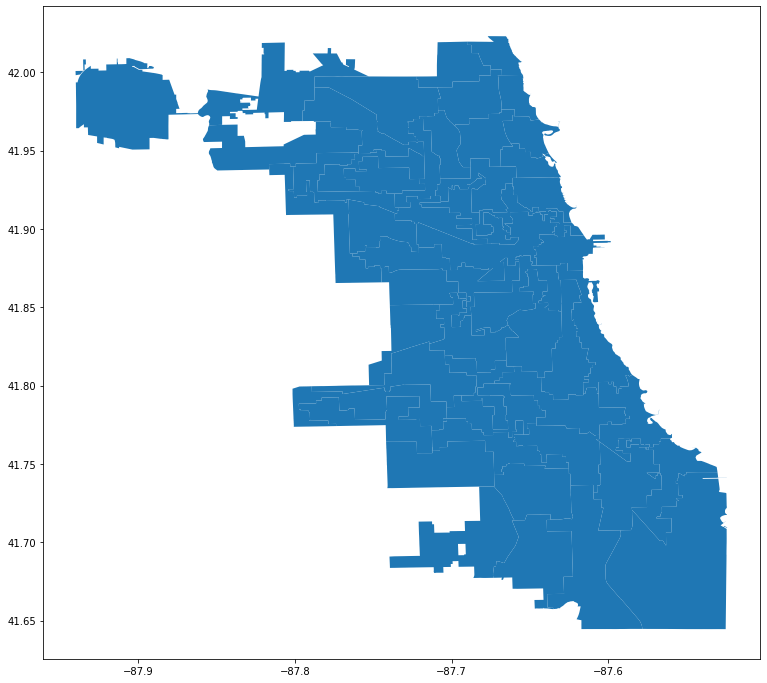

In [50]:
wards_df.plot(figsize=(16,12))

In [51]:
compressed_ward_df = wards_df

In [52]:
compressed_ward_df['geometry'] = compressed_ward_df.geometry.simplify(0.00001)

In [53]:
compressed_ward_df

shape_area     shape_leng ward  \
0   116096507.849  93073.3408379   12   
1   103143638.546  97901.3238332   16   
2    65588297.917  82183.6948197   15   
3    137290356.97  90105.1956185   20   
4   49733459.1385  38122.6928259   49   
5   142982293.923  125226.472414   23   
6   128819108.627  107529.243573   29   
7   143011018.899  90165.7974072   14   
8   123341548.953  81530.2751668    3   
9   126006901.096  119468.403755    4   
10  53934808.8716  110739.852187    2   
11   57297718.519  67016.6379392   35   
12  142463997.962  53846.7782943   21   
13  104690374.815  75191.5803706   24   
14  117333021.721  91758.1670663   13   
15   44838916.158  34831.9936751   48   
16  69739758.4303  50635.7831536   31   
17  87363636.3844  53371.3055095   47   
18  174307429.474  89794.4594966   38   
19  70214893.3538  47062.4200753   33   
20  73730115.3644  81026.9888174   30   
21  175928766.112  78608.6539809   34   
22  142879662.243  119977.208819   28   
23  95929056.6812  48374.9136177   40   
24  49422863.0048  46466.2721725   44   
25  124734729.578  105358.092147   25   
26  80692979.8113  46116.3788804   50   
27  106633676.288   63985.118325   22   
28   484238238.97  252516.011482   41   
29  183256966.765   65699.143324   18   
30  113383616.514  100910.871779   17   
31  120539114.428  69925.2023858    6   
32  115196005.523  102271.665896    5   
33  65206365.4153  48544.5349075   43   
34  162845783.237  89830.3932001    8   
35  71494714.6921  62491.4598917   42   
36  124077234.808  112151.646919    7   
37  175096482.287  73079.9934303   39   
38  53665279.3293  47937.9510595   46   
39  85458138.8521  79455.8112626   32   
40  69757593.8542   102569.70148    1   
41  214115105.843  102339.878771   19   
42  257088769.485  111742.641889    9   
43  88624184.1876  91959.9836412   36   
44  96123627.3494   54306.074303   37   
45  163221187.276  130222.911895   27   
46   548958842.58  144026.595563   10   
47  142093459.943  82824.4632842   11   
48  70391187.5645  69089.8822547   26   
49  125334245.511  76714.8413866   45   

                                             geometry  
0   POLYGON ((-87.69623 41.85755, -87.69625 41.857...  
1   POLYGON ((-87.66289 41.79884, -87.66277 41.794...  
2   POLYGON ((-87.69818 41.81729, -87.69458 41.817...  
3   POLYGON ((-87.65524 41.80883, -87.65524 41.808...  
4   POLYGON ((-87.66420 42.02126, -87.66419 42.021...  
5   POLYGON ((-87.71361 41.80054, -87.71340 41.793...  
6   POLYGON ((-87.80311 41.94001, -87.80310 41.939...  
7   POLYGON ((-87.71438 41.82673, -87.71430 41.822...  
8   POLYGON ((-87.61822 41.85542, -87.61721 41.853...  
9   POLYGON ((-87.62597 41.87336, -87.62597 41.873...  
10  POLYGON ((-87.66137 41.92723, -87.66139 41.927...  
11  POLYGON ((-87.71827 41.96880, -87.71809 41.962...  
12  POLYGON ((-87.66282 41.75002, -87.66282 41.749...  
13  POLYGON ((-87.74004 41.87200, -87.74004 41.871...  
14  POLYGON ((-87.73167 41.78038, -87.73380 41.780...  
15  POLYGON ((-87.65577 41.99820, -87.65574 41.998...  
16  POLYGON ((-87.74688 41.93927, -87.74687 41.938...  
17  POLYGON ((-87.65977 41.97268, -87.66114 41.972...  
18  POLYGON ((-87.77717 41.96513, -87.77717 41.964...  
19  POLYGON ((-87.70353 41.97186, -87.70322 41.971...  
20  POLYGON ((-87.72406 41.94972, -87.72266 41.948...  
21  POLYGON ((-87.63704 41.71746, -87.63697 41.714...  
22  POLYGON ((-87.72098 41.88805, -87.71122 41.888...  
23  POLYGON ((-87.66796 41.99811, -87.67059 41.998...  
24  MULTIPOLYGON (((-87.65682 41.95160, -87.65681 ...  
25  POLYGON ((-87.64972 41.88268, -87.64962 41.879...  
26  POLYGON ((-87.69018 42.01929, -87.69020 42.017...  
27  POLYGON ((-87.71098 41.85174, -87.71089 41.851...  
28  MULTIPOLYGON (((-87.80655 42.01872, -87.80676 ...  
29  POLYGON ((-87.67862 41.76081, -87.67854 41.757...  
30  POLYGON ((-87.69093 41.77800, -87.69091 41.777...  
31  POLYGON ((-87.64587 41.77444, -87.64586 41.774...  
32  POLYGON ((-87.58337 41.80585, -87.58320 41.805...  
33  POLYGON

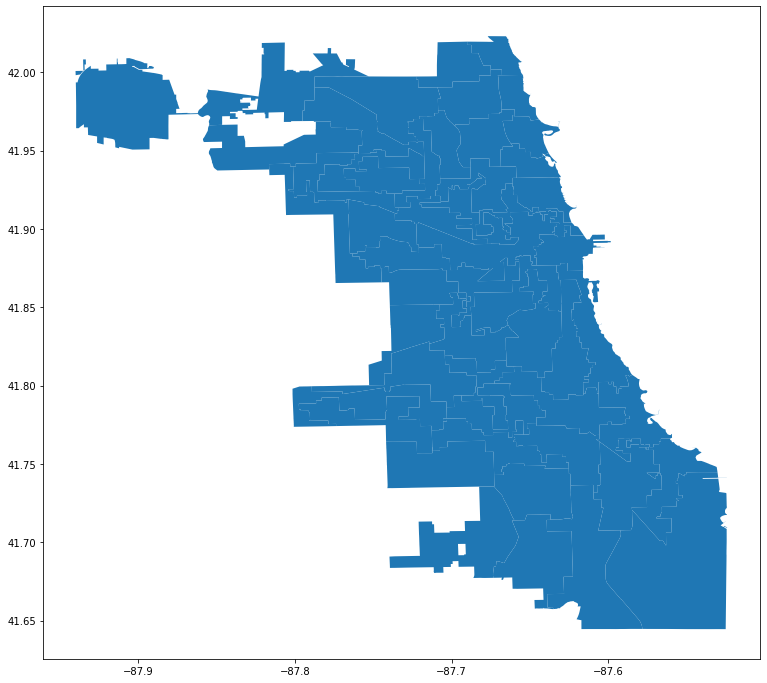

In [54]:
compressed_ward_df.plot(figsize=(16,12))

In [55]:
compressed_ward_df.to_file("./ChicagoWards2015+_Compressed.geojson", driver='GeoJSON')

ERROR:fiona._env:./ChicagoWards2015+_Compressed.geojson: No such file or directory


In [34]:
compressed_ward_df

0     POLYGON ((-87.69623 41.85755, -87.69625 41.857...
1     POLYGON ((-87.66289 41.79884, -87.66289 41.798...
2     POLYGON ((-87.69818 41.81729, -87.69817 41.817...
3     POLYGON ((-87.65524 41.80883, -87.65524 41.808...
4     POLYGON ((-87.66420 42.02126, -87.66419 42.021...
5     POLYGON ((-87.71361 41.80054, -87.71360 41.800...
6     POLYGON ((-87.80311 41.94001, -87.80310 41.939...
7     POLYGON ((-87.71438 41.82673, -87.71437 41.826...
8     POLYGON ((-87.61822 41.85542, -87.61721 41.853...
9     POLYGON ((-87.62597 41.87336, -87.62597 41.873...
10    POLYGON ((-87.66137 41.92723, -87.66139 41.927...
11    POLYGON ((-87.71827 41.96880, -87.71825 41.968...
12    POLYGON ((-87.66282 41.75002, -87.66282 41.749...
13    POLYGON ((-87.74004 41.87200, -87.74004 41.871...
14    POLYGON ((-87.73167 41.78038, -87.73194 41.780...
15    POLYGON ((-87.65577 41.99820, -87.65574 41.998...
16    POLYGON ((-87.74688 41.93927, -87.74687 41.938...
17    POLYGON ((-87.65977 41.97268, -87.66025 41

In [53]:
wards_df.head()

shape_area     shape_leng ward  \
0  116096507.849  93073.3408379   12   
1  103143638.546  97901.3238332   16   
2   65588297.917  82183.6948197   15   
3   137290356.97  90105.1956185   20   
4  49733459.1385  38122.6928259   49   

                                            geometry  
0  MULTIPOLYGON (((-87.69623 41.85755, -87.69625 ...  
1  MULTIPOLYGON (((-87.66289 41.79884, -87.66289 ...  
2  MULTIPOLYGON (((-87.69818 41.81729, -87.69817 ...  
3  MULTIPOLYGON (((-87.65524 41.80883, -87.65524 ...  
4  MULTIPOLYGON (((-87.66420 42.02126, -87.66419 ...

In [54]:
wards_df.columns

Index(['shape_area', 'shape_leng', 'ward', 'geometry'], dtype='object')

In [55]:
gpd_polygonized_raster['ward'] = None

In [56]:
gpd_polygonized_raster.columns.get_loc("ward")

2

In [57]:
gpd_polygonized_raster

geometry  raster_val  ward
0       POLYGON ((-87.67597 42.02497, -87.67597 42.024...         1.0  None
1       POLYGON ((-87.67498 42.02497, -87.67498 42.024...         2.0  None
2       POLYGON ((-87.67301 42.02497, -87.67301 42.024...         1.0  None
3       POLYGON ((-87.67696 42.02451, -87.67696 42.024...         1.0  None
4       POLYGON ((-87.67646 42.02451, -87.67646 42.024...         2.0  None
...                                                   ...         ...   ...
152999  POLYGON ((-87.61373 41.64591, -87.61373 41.645...         2.0  None
153000  POLYGON ((-87.61324 41.64591, -87.61324 41.645...         1.0  None
153001  POLYGON ((-87.54607 41.64591, -87.54607 41.645...         1.0  None
153002  POLYGON ((-87.61522 41.64546, -87.61522 41.645...         1.0  None
153003  POLYGON ((-87.97726 42.06083, -87.97726 41.606...         0.0  None

[153004 rows x 3 columns]

In [58]:
def appendWard(row):
    boundbox = row['geometry']
    bb_df = gp.GeoSeries(boundbox)
    bool_within_bb = gpd_polygonized_raster.geometry.intersects(boundbox)
    index_within_bb = gpd_polygonized_raster[bool_within_bb].index
    c = row['ward']
    gpd_polygonized_raster.iloc[index_within_bb,gpd_polygonized_raster.columns.get_loc("ward")] = c
    print('curent ward is:' + str(c))
    print("count rows within count: " + str(len(index_within_bb)))
    print("-"*25)
    return (c, index_within_bb)

In [59]:
gpd_polygonized_raster["ward"] = None
list_of_index = wards_df.apply(appendWard, axis=1)

curent ward is:12
count rows within count: 2880
-------------------------
curent ward is:16
count rows within count: 3962
-------------------------
curent ward is:15
count rows within count: 2446
-------------------------
curent ward is:20
count rows within count: 4584
-------------------------
curent ward is:49
count rows within count: 1795
-------------------------
curent ward is:23
count rows within count: 3199
-------------------------
curent ward is:29
count rows within count: 3860
-------------------------
curent ward is:14
count rows within count: 3043
-------------------------
curent ward is:3
count rows within count: 4232
-------------------------
curent ward is:4
count rows within count: 3465
-------------------------
curent ward is:2
count rows within count: 1987
-------------------------
curent ward is:35
count rows within count: 2164
-------------------------
curent ward is:21
count rows within count: 4754
-------------------------
curent ward is:24
count rows within count

In [60]:
gpd_polygonized_raster.head()

geometry  raster_val  ward
0  POLYGON ((-87.67597 42.02497, -87.67597 42.024...         1.0  None
1  POLYGON ((-87.67498 42.02497, -87.67498 42.024...         2.0  None
2  POLYGON ((-87.67301 42.02497, -87.67301 42.024...         1.0  None
3  POLYGON ((-87.67696 42.02451, -87.67696 42.024...         1.0  None
4  POLYGON ((-87.67646 42.02451, -87.67646 42.024...         2.0  None

In [61]:
gpd_polygonized_raster = gpd_polygonized_raster.dissolve(by=['ward','raster_val'])

In [62]:
pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val'])

ward  raster_val
0       1         0.0
1       1         1.0
2       1         2.0
3       1         3.0
4       1         4.0
...   ...         ...
4791    9       134.0
4792    9       136.0
4793    9       140.0
4794    9       148.0
4795    9       150.0

[4796 rows x 2 columns]

In [63]:
#gpd_polygonized_raster[['ward','raster_val']] = pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val'])

In [64]:
gpd_polygonized_raster

geometry
ward raster_val                                                   
1    0.0         MULTIPOLYGON (((-87.67745 41.89423, -87.67745 ...
     1.0         MULTIPOLYGON (((-87.67597 41.89241, -87.67498 ...
     2.0         MULTIPOLYGON (((-87.67498 41.89241, -87.67449 ...
     3.0         MULTIPOLYGON (((-87.67646 41.89196, -87.67597 ...
     4.0         MULTIPOLYGON (((-87.66362 41.89150, -87.66313 ...
...                                                            ...
9    134.0       POLYGON ((-87.62263 41.71718, -87.62263 41.716...
     136.0       MULTIPOLYGON (((-87.61769 41.67406, -87.61769 ...
     140.0       POLYGON ((-87.61719 41.67406, -87.61719 41.673...
     148.0       POLYGON ((-87.62312 41.71718, -87.62312 41.716...
     150.0       POLYGON ((-87.62312 41.71673, -87.62312 41.716...

[4796 rows x 1 columns]

In [65]:
gpd_polygonized_raster["geometry"] = gpd_polygonized_raster["geometry"].simplify(0)

In [66]:
#gpd_polygonized_raster[["geometry","raster_val"]].plot(column='raster_val',figsize=(10,10))

In [67]:
pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val']).describe('')

raster_val
count  4796.000000
mean     55.992494
std      41.610443
min       0.000000
50%      48.000000
max     255.000000

In [68]:
gpd_polygonized_raster['start_date'] = pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1)))
gpd_polygonized_raster['end_date'] = pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))

In [69]:
gpd_polygonized_raster.rename(columns={'raster_val': 'density'}, inplace=True)

In [70]:
gpd_polygonized_raster

geometry start_date  \
ward raster_val                                                                 
1    0.0         MULTIPOLYGON (((-87.67745 41.89423, -87.67745 ... 2020-04-10   
     1.0         MULTIPOLYGON (((-87.67597 41.89241, -87.67498 ... 2020-04-10   
     2.0         MULTIPOLYGON (((-87.67498 41.89241, -87.67449 ... 2020-04-10   
     3.0         MULTIPOLYGON (((-87.67646 41.89196, -87.67597 ... 2020-04-10   
     4.0         MULTIPOLYGON (((-87.66362 41.89150, -87.66313 ... 2020-04-10   
...                                                            ...        ...   
9    134.0       POLYGON ((-87.62263 41.71718, -87.62263 41.716... 2020-04-10   
     136.0       MULTIPOLYGON (((-87.61769 41.67406, -87.61769 ... 2020-04-10   
     140.0       POLYGON ((-87.61719 41.67406, -87.61719 41.673... 2020-04-10   
     148.0       POLYGON ((-87.62312 41.71718, -87.62312 41.716... 2020-04-10   
     150.0       POLYGON ((-87.62312 41.71673, -87.62312 41.716... 2020-04-10   

                           end_date  
ward raster_val                      
1    0.0        2020-05-09 23:59:00  
     1.0        2020-05-09 23:59:00  
     2.0        2020-05-09 23:59:00  
     3.0        2020-05-09 23:59:00  
     4.0        2020-05-09 23:59:00  
...                             ...  
9    134.0      2020-05-09 23:59:00  
     136.0      2020-05-09 23:59:00  
     140.0      2020-05-09 23:59:00  
     148.0      2020-05-09 23:59:00  
     150.0      2020-05-09 23:59:00  

[4796 rows x 3 columns]

In [71]:
#gpd_polygonized_raster.to_file("/home/zhimin90/DePaul/DSC468/Experiment/Crime_2020_lowres.geojson", driver='GeoJSON')